In [25]:
import pandas as pd
dataset=pd.read_excel('songs.xlsx')

In [26]:
dataset.head()

,Unnamed: 0,name,album,release_date,track_number,id,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
0,0,Concert Intro Music - Live,Licked Live In NYC,2022-06-10,1,2IEkywLJ4ykbhi1yRQvmsT,spotify:track:2IEkywLJ4ykbhi1yRQvmsT,0.0824,0.463,0.993,0.996000,0.932,-12.913,0.1100,118.001,0.0302,33,48640
1,1,Street Fighting Man - Live,Licked Live In NYC,2022-06-10,2,6GVgVJBKkGJoRfarYRvGTU,spotify:track:6GVgVJBKkGJoRfarYRvGTU,0.4370,0.326,0.965,0.233000,0.961,-4.803,0.0759,131.455,0.3180,34,253173
2,2,Start Me Up - Live,Licked Live In NYC,2022-06-10,3,1Lu761pZ0dBTGpzxaQoZNW,spotify:track:1Lu761pZ0dBTGpzxaQoZNW,0.4160,0.386,0.969,0.400000,0.956,-4.936,0.1150,130.066,0.3130,34,263160
3,3,If You Can't Rock Me - Live,Licked Live In NYC,2022-06-10,4,1agTQzOTUnGNggyckEqiDH,spotify:track:1agTQzOTUnGNggyckEqiDH,0.5670,0.369,0.985,0.000107,0.895,-5.535,0.1930,132.994,0.1470,32,305880
4,4,Donâ€™t Stop - Live,Licked Live In NYC,2022-06-10,5,7piGJR8YndQBQWVXv6KtQw,spotify:track:7piGJR8YndQBQWVXv6KtQw,0.4000,0.303,0.969,0.055900,0.966,-5.098,0.0930,130.533,0.2060,32,305106


In [27]:
dataset['album'].unique().size

90

In [28]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1610 entries, 0 to 1609
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Unnamed: 0        1610 non-null   int64         
 1   name              1610 non-null   object        
 2   album             1610 non-null   object        
 3   release_date      1610 non-null   datetime64[ns]
 4   track_number      1610 non-null   int64         
 5   id                1610 non-null   object        
 6   uri               1610 non-null   object        
 7   acousticness      1610 non-null   float64       
 8   danceability      1610 non-null   float64       
 9   energy            1610 non-null   float64       
 10  instrumentalness  1610 non-null   float64       
 11  liveness          1610 non-null   float64       
 12  loudness          1610 non-null   float64       
 13  speechiness       1610 non-null   float64       
 14  tempo             1610 n

In [29]:
from sklearn.preprocessing import LabelEncoder
encode=LabelEncoder()
dataset['album']=encode.fit_transform(dataset['album'])

In [30]:
s=dataset.iloc[:,[7,8,9,10,11,12,13,14,15,16,17]]

In [31]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler().fit_transform(s)

In [32]:
from sklearn.cluster import KMeans

In [33]:
y=pd.DataFrame(scale)

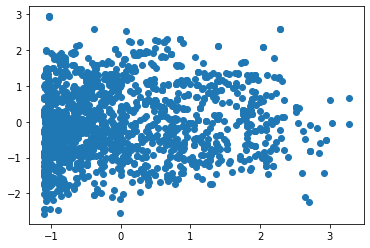

In [34]:
import matplotlib.pyplot as plt
plt.scatter(y[0],y[1])

In [37]:
# Create an empty dictionary to save the within cluster sum of square values
wcss = {} 
# Look through the number of clusters
for i in range(1,10):
  # Run kmeans model
  kmeans = KMeans(n_clusters=i, random_state=0).fit(y)
  #Sum of squared distances of samples to their closest cluster center.
  wcss[i] = (kmeans.inertia_)
  # Print the within cluster sum of squares for each cluster number
  print(f'The within cluster sum of squares for {i} clusters is {wcss[i]:.2f}')

The within cluster sum of squares for 1 clusters is 17710.00
The within cluster sum of squares for 2 clusters is 14209.98
The within cluster sum of squares for 3 clusters is 12687.51
The within cluster sum of squares for 4 clusters is 11776.00
The within cluster sum of squares for 5 clusters is 11059.42
The within cluster sum of squares for 6 clusters is 10417.73
The within cluster sum of squares for 7 clusters is 9887.19
The within cluster sum of squares for 8 clusters is 9393.55
The within cluster sum of squares for 9 clusters is 9073.97


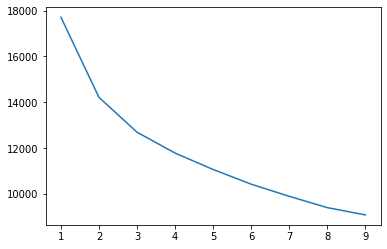

In [38]:


plt.plot(list(wcss.keys()),list(wcss.values()))

In [39]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(y)

In [40]:
t=kmeans.predict(y)

In [41]:
t

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [42]:
dataset['song_type']=pd.Series(t)

In [43]:
dataset

,Unnamed: 0,name,album,release_date,track_number,id,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms,song_type
0,0,Concert Intro Music - Live,47,2022-06-10,1,2IEkywLJ4ykbhi1yRQvmsT,spotify:track:2IEkywLJ4ykbhi1yRQvmsT,0.0824,0.463,0.993,0.996000,0.9320,-12.913,0.1100,118.001,0.0302,33,48640,0
1,1,Street Fighting Man - Live,47,2022-06-10,2,6GVgVJBKkGJoRfarYRvGTU,spotify:track:6GVgVJBKkGJoRfarYRvGTU,0.4370,0.326,0.965,0.233000,0.9610,-4.803,0.0759,131.455,0.3180,34,253173,0
2,2,Start Me Up - Live,47,2022-06-10,3,1Lu761pZ0dBTGpzxaQoZNW,spotify:track:1Lu761pZ0dBTGpzxaQoZNW,0.4160,0.386,0.969,0.400000,0.9560,-4.936,0.1150,130.066,0.3130,34,263160,0
3,3,If You Can't Rock Me - Live,47,2022-06-10,4,1agTQzOTUnGNggyckEqiDH,spotify:track:1agTQzOTUnGNggyckEqiDH,0.5670,0.369,0.985,0.000107,0.8950,-5.535,0.1930,132.994,0.1470,32,305880,0
4,4,Donâ€™t Stop - Live,47,2022-06-10,5,7piGJR8YndQBQWVXv6KtQw,spotify:track:7piGJR8YndQBQWVXv6KtQw,0.4000,0.303,0.969,0.055900,0.9660,-5.098,0.0930,130.533,0.2060,32,305106,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1605,1605,Carol,76,1964-04-16,8,08l7M5UpRnffGl0FyuRiQZ,spotify:track:08l7M5UpRnffGl0FyuRiQZ,0.1570,0.466,0.932,0.006170,0.3240,-9.214,0.0429,177.340,0.9670,39,154080,1
1606,1606,Tell Me,76,1964-04-16,9,3JZllQBsTM6WwoJdzFDLhx,spotify:track:3JZllQBsTM6WwoJdzFDLhx,0.0576,0.509,0.706,0.000002,0.5160,-9.427,0.0843,122.015,0.4460,36,245266,1
1607,1607,Can I Get A Witness,76,1964-04-16,10,0t2qvfSBQ3Y08lzRRoVTdb,spotify:track:0t2qvfSBQ3Y08lzRRoVTdb,0.3710,0.790,0.774,0.000000,0.0669,-7.961,0.0720,97.035,0.8350,30,176080,1
1608,1608,You Can Make It If You Try,76,1964-04-16,11,5ivIs5vwSj0RChOIvlY3On,spotify:track:5ivIs5vwSj0RChOIvlY3On,0.2170,0.700,0.546,0.000070,0.1660,-9.567,0.0622,102.634,0.5320,27,121680,1
